## El objetivo de este ejercicio es calcular la función de política óptima epsilon greedy ("epsilon-ávida")
<img src="Epsilon_Greedy_MC.PNG">

In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np

from collections import defaultdict

# en caso de correrlo en google colab
# de esta manera podremos tener la carpeta lib (donde se encuentra en ambiente Gridworld)

# import sys
#if "../" not in sys.path:
#  sys.path.append("../") 

# !git clone https://github.com/julianfm7/cursoRL-FIUBA

# necesario en google colab para que sys.path busque
# y encuentre la carpeta lib donde se encuentra el ambiente Gridworld

# !mv cursoRL-FIUBA cursoRLFIUBA

# import numpy as np
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [7]:
# vamos a utilizar el ambiente de BlackJack como ejemplo
env = BlackjackEnv()

In [10]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Crea una política epsilon-greedy basado en una q-función (función de valor estado-acción) y un epsilon dados.
    
    Argumentos:
        Q: un diccionario que mapea cada estado/observación s a un array de numpy Q[s] = array([v_0, v_1, ... , v_nA]) de longitud nA
        que para un índice a del array contiene el valor v_a de tomar la acción a en el estado s. 
        (en nuestra notación de la clase q(s,a))
         
        epsilon: probabilidad de seleccionar una acción aleatoria (obliga a explorar), valor entre 0 y 1.
        
        nA: número de acciones en el entorno
    
    Retorna:
        Una función que dada una observación como argumento, retorna una política (un array de numpy de longitud nA)
        con probabilidades para cada acción. La política es tal que toma la mejor acción según Q con probabilidad (1-epsilon)
        y toma una acción al azar con probabilidad epsilon
        
    """
    def policy_fn(observation):
        # devolver un array de longitud nA con valores epsilon/nA para todas las acciones
        # excepto para la mejor acción según Q dada esta observación (estado), 
        # que debe tener probabilidad (1 - epsilon + epsilon/nA)
        
        # Implementar!
        probabilidades_acciones = np.ones(nA)*epsilon/nA
        mejor_accion = np.argmax(Q[(observation)])
        probabilidades_acciones[mejor_accion] = 1 - epsilon + epsilon/nA
        
        return probabilidades_acciones
        
        
    return policy_fn

In [263]:
def mc_control_epsilon_greedy(env, num_episodes, discount_factor=1.0, epsilon=0.1):
    """
    Control Monte Carlo utiliando políticas epsilon-greedy
    Encuentra la política epsilon-greedy óptima.
    
    Argumentos:
        env: ambiente de OpenAI gym.
        num_episodes: número de episodios a samplear.
        discount_factor: factor de descuento gama.
        epsilon: probabilidad de samplear una acción aleatoria. Valor entre 0 y 1.
    
    Retorna:
        Una tupla (Q, policy)
        Q es un diccionario que mapea cada estado/observación s a un array de numpy Q[s] = array([v_0, v_1, ... , v_nA]) de longitud nA
        que para un índice a del array contiene el valor v_a de tomar la acción a en el estado s. 
        (en nuestra notación de la clase q(s,a))
        policy es una función que toma una observación/estado como argumento y retorna un array numpy 
        de longitud nA con las probabilidades de cada acción
        
    """
    
    # mantienen la suma y la cantidad de retornos para cada estado
    # para calcular un promedio. Podríamos utilizar un array para guardar todos los retornos
    # también, pero sería más infeciente en términos de espacio
#     returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # La función de valor estado-acción resultante
    # un diccionario que para cada estado devuelve un array de numpy de longitud nA
    # con la estimación de valor estado acción para cada para acción
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # la política que estamos siguiendo
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    # Implementar!
   

    def generar_episodio():
        episodio = []
        observation = env.reset()
        while True:
            observation_old = observation
            probabilidades_acciones = policy(observation)
            action = np.random.choice(probabilidades_acciones.size, 1, False, probabilidades_acciones)[0]
            observation, reward, done, _ = env.step(action)
            episodio.append((observation_old,action,reward))
            if done or len(episodio)==100:
                break
        return np.array(episodio)


    # por cada episodio de num_episodes en total
    for _ in range(num_episodes):
        # paso 1: generar un episodio
        # para ello:
        # resetear el ambiente y obtener el primer estado
        # por cada t de 0 a 99 (limitamos la longitud de los episodios a 100)
            # obtener las probabilidades de la política dado el estado en que estamos
            # hallar la próxima acción según la distribución de la política
            # tomar la acción
            # agregar la tupla (estado, acción, recompensa) al episodio
            # si el episodio acabó: pasar al próximo episodio
            # actualizar el estado en el que estamos para realizar la transición
        
        episodio = generar_episodio()
            
        # paso 2: actualizar la función Q con la información del episodio
        # para ello, 
        # por cada tupla (estado, acción) en el episodio
        # (TIP: ES POSIBLE USAR set() para obtener las tuplas únicas (estado, acción)
            # obtener la primera vez que ocurre la tupla
            # sumar todas las recompensas a partir de ese punto descontadas por gama
            # para obtener G, el retorno el episodio
            # en el diccionario returns_sum acumular para la tupla (estado, acción) el retorno obtenido
            # en el diccionario returns_count adicionar una visita a la tupla (estado, acción)
            # actualizar Q[estado][accion] dado los nuevos valores de returns_sum y returns_count
            # otra forma es usar la fórmula que actualiza el actual valor del promedio usando el valor anterior,
            # la cantidad de veces que vimos el par (estado, accion) y el valor de la recompensa en este episodio
        
        
        G = 0
        for tiempo, estado_action_reward in enumerate(reversed(episodio)):
            estado = estado_action_reward[0]
            action = estado_action_reward[1]
            reward = estado_action_reward[2]
            G = discount_factor*G + reward
#             estados_anteriores = list(reversed(episodio[:,0]))[tiempo+1:]
#             acciones_anteriores = list(reversed(episodio[:,1]))[tiempo+1:]
#             estados_acciones_anteriores = set( list(zip(estados_anteriores,acciones_anteriores)) )
#             if (estado,action) not in estados_acciones_anteriores:
            if (estado,action) not in np.array(episodio[::-1])[:,0:2][tiempo+1:]:
#                 returns_sum[(estado)] += G
                returns_count[(estado)] += 1
#                 V[(estado)] = returns_sum[(estado)]/returns_count[(estado)]
#                 V[(estado)] += (G-V[(estado)])/returns_count[(estado)] #forma copada de actualizar el promedio dado un dato nuevo
                Q[(estado)][action] += (G-Q[(estado)][action])/returns_count[(estado)]

        # NOTAR: el diccionario de Q se actualiza en cada episodio, y por lo tanto también se 
        # actualiza la función policy, que utiliza ese diccionario, mirar la última celda de este
        # notebook para entender por qué
    
    
    return Q, policy

In [271]:
Q, policy = mc_control_epsilon_greedy(env, num_episodes=500000, epsilon=0.1)
# Q, policy = mc_control_epsilon_greedy(env, num_episodes=500, epsilon=0.1)

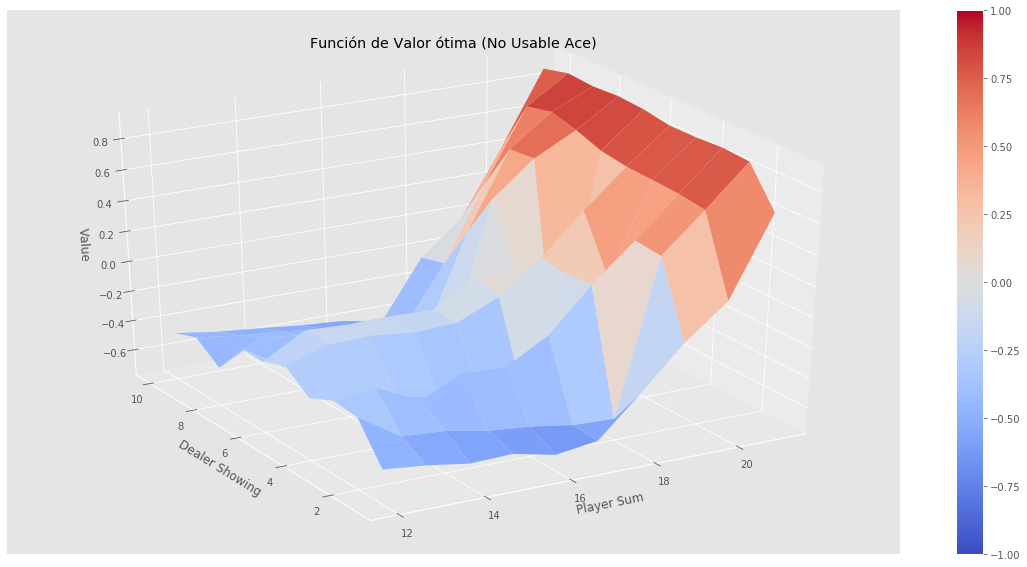

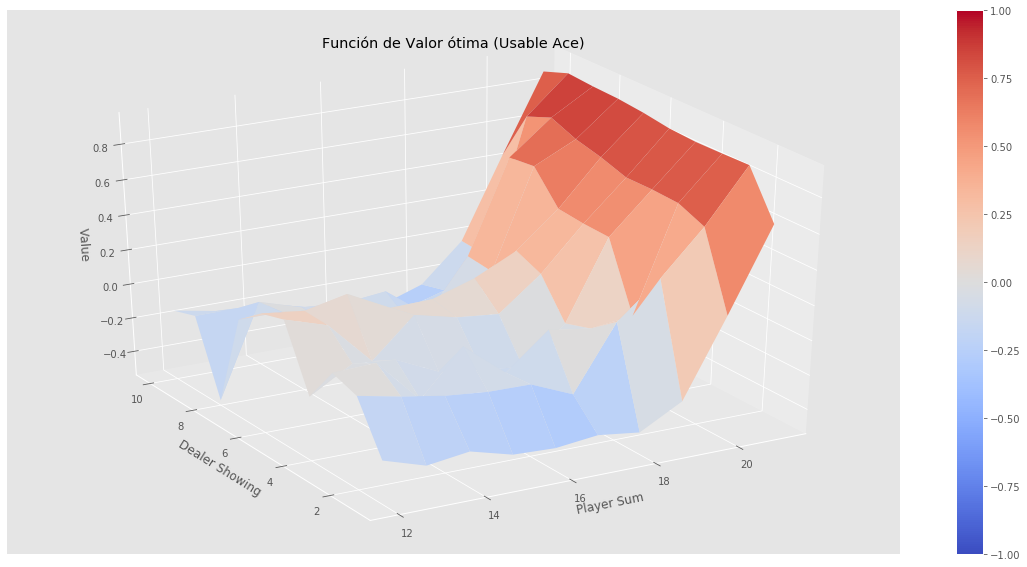

In [272]:
# Para plotear: crear una función valor dada una función valor de estado-acción
# eligiendo la mejor acción en cada estado
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value
plotting.plot_value_function(V, title="Función de Valor ótima")

In [5]:
# ejemplo de cómo la política se actualiza cuando Q se actualiza
import numpy as np
from collections import defaultdict
tt = defaultdict(lambda: np.zeros(10))
def func_get_back_tt(tt):
    def tt_back(a):
        return tt[a]
    return tt_back
tt_back = func_get_back_tt(tt)
tt[0] += np.ones(10)
print(tt_back(0))
tt[0] += np.ones(10)
print(tt_back(0))


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
